# Task B

In [1]:
from parameters import *
from functions import *
walks = 1000
X0 = [-1.5, 1.]

1.9127133419166196


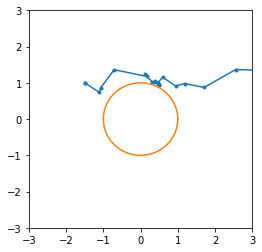

In [2]:
np.random.seed(SEED) #scipy is based on the numpy seed
X, finalTime = RandomWalkAdaptiveTimeStep(X0, T)

#plots the walk
plt.figure(figsize=[4,4])
X = X.T
plt.plot(X[0,:],X[1,:], '.-')
plt.xlim([-3,3])
plt.ylim([-3,3])

#plots the well
theta = np.linspace(0,2*np.pi,100)
plt.plot(R*np.cos(theta),R*np.sin(theta))
print(finalTime)

# MC simulation

In [3]:
np.random.seed(SEED) #scipy is based on the numpy seed
polluted = np.zeros(walks)
for w in range(walks):
    if (w%100 == 0):
        print('Current walk: ', w )
    #diff equation
    _, finalT = RandomWalkAdaptiveTimeStep(X0,1)
    if finalT < T:
            polluted[w] = 1

Current walk:  0
Current walk:  100
MAXITERS limit reached
Current walk:  200
Current walk:  300
Current walk:  400
Current walk:  500
Current walk:  600
Current walk:  700
Current walk:  800
Current walk:  900


In [4]:
confidence = 0.95
mean = polluted.mean()
std = np.std(polluted, ddof = 1)
LB, UB = CI(mean, std, walks, confidence)

print(f'Number of simulations: {walks}')
print(f'The estimated probability at {X0} is: {mean}')
print(f'Confidence interval: [ {mean} +- {UB-mean} ]\twith P = {confidence}%')

Number of simulations: 1000
The estimated probability at [-1.5, 1.0] is: 0.722
Confidence interval: [ 0.722 +- 0.02781524134389113 ]	with P = 0.95%


# Sometimes we are really near to the well...

In these cases the steps become too small and we go on "forever", I set a maximum numbers of iterations to stop that simulations. This is a visualization of one of this (rare) situations

MAXITERS limit reached


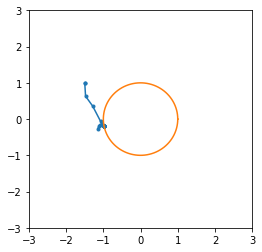

In [5]:
np.random.seed(1) #scipy is based on the numpy seed
TT = 0
while (TT!= 111):
    X, TT = RandomWalkAdaptiveTimeStep(X0, T)

#plots the walk
plt.figure(figsize=[4,4])
X = np.asarray(X)
X = X.T
plt.plot(X[0,:],X[1,:], '.-')
plt.xlim([-3,3])
plt.ylim([-3,3])

#plots the well
theta = np.linspace(0,2*np.pi,100)
plt.plot(R*np.cos(theta),R*np.sin(theta))